# Clasificador Bayesiano de Idiomas

Parara reponer las 4 horas de la semana pasada, y como ejercicio de las cosas que ya vimos en clase, quiero que hagan un clasificador de idioma de 3 o 4 lenguas distintas. La característica que utilizará el clasificador, será n-gramas (caracteres) y ustedes deben determinar una n óptima basados en las métricas de evaluación dadas anteriormente. El clasificador, hagan un clasificador tipo Bayesiano (programenlo ustedes, por favor). Utilicen el truco de los exponentes que vimos la penúltima vez.

In [25]:
import nltk
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt

In [34]:
corpus_esp = """Se tomará como periodo de contingencia a partir del 18 de marzo de 2020 hasta nuevo aviso.
Ante los recientes hechos respecto al COVID-19, en cuanto la Facultad reanude actividades de forma normal se reprogramarán los eventos que se vieron afectados.
Se pide, una vez que se reanuden actividades en la Facultad de Ingeniería, estar pendiente de alguna actualización en la Guía Escolar, así como, de las páginas donde se publiquen las fechas para extraordinarios.
El peso mexicano cortó este viernes una racha de tres sesiones al alza después de que S&P rebajó la calificación crediticia de México y de la petrolera estatal Pemex, en medio de la crisis por la propagación del coronavirus.
En la madrigada la moneda local cotizó en 23.35 por dólar, con una pérdida del 1.83 por ciento, frente a los 22.93 del precio de referencia de Reuters del jueves.
S&P rebajó el jueves la calificación crediticia de México en moneda extranjera a largo plazo a "BBB" desde "BBB+", y mantuvo su perspectiva negativa, lo que refleja la posibilidad de que haya nuevas bajas a la nota soberana durante los siguientes 12 a 24 meses, en plena crisis del coronavirus.
La agencia también rebajó la nota crediticia de Pemex a "BBB" con perspectiva negativa.
Mientras tanto, JP Morgan dijo el jueves que prevé una contracción de la economía mexicana de 7 por ciento este año y de 35.5 por ciento en el segundo trimestre a tasa anual."""
corpus_pt = """Será tomado como um período de contingência a partir de 18 de março de 2020 até novo aviso.
Tendo em conta os recentes eventos relativos à COVID-19, assim que a Faculdade retomar as actividades normais, os eventos que foram afectados serão reagendados.
Uma vez retomadas as actividades na Escola de Engenharia, pedimos-lhe que tome conhecimento de quaisquer actualizações no Guia da Escola, bem como das páginas onde são publicadas as datas dos eventos extraordinários.
O peso mexicano cortou uma sequência ascendente de três sessões na sexta-feira, depois que a S&P baixou o rating de crédito do México e da companhia petrolífera estatal Pemex em meio à crise sobre a propagação do coronavírus.
Na madrigada a moeda local foi negociada a 23,35 por dólar, uma perda de 1,83 por cento, em comparação com 22,93 do preço de referência da Reuters na quinta-feira.
A S&P baixou o rating de crédito em moeda estrangeira de longo prazo do México para "BBB" de "BBB+" na quinta-feira, mantendo suas perspectivas negativas, refletindo a possibilidade de novos downgrades para o rating soberano nos próximos 12 a 24 meses, no auge da crise do coronavírus.
A agência também baixou a classificação de crédito da Pemex para "BBB" com uma perspectiva negativa.
Enquanto isso, o JP Morgan disse na quinta-feira que espera que a economia mexicana diminua 7% este ano e 35,5% no segundo trimestre a uma taxa anual."""
corpus_eng = """It will be taken as a contingency period from March 18, 2020 until further notice.
In view of the recent events regarding COVID-19, as soon as the Faculty resumes normal activities, the events that were affected will be rescheduled.
Once activities resume in the School of Engineering, we ask you to be aware of any updates in the School Guide, as well as the pages where the dates for extraordinary events are published.
The Mexican peso cut a three-session upward streak on Friday after S&P downgraded Mexico's credit rating and that of state oil company Pemex amid the crisis over the spread of the coronavirus.
In the madrigada the local currency traded at 23.35 per dollar, a loss of 1.83 percent, compared to 22.93 of the reference price of Reuters on Thursday.
S&P downgraded Mexico's long-term foreign currency credit rating to "BBB" from "BBB+" on Thursday, maintaining its negative outlook, reflecting the possibility of further downgrades to the sovereign rating over the next 12 to 24 months at the height of the coronavirus crisis.
The agency also lowered Pemex's credit rating to "BBB" with a negative perspective.
Meanwhile, JP Morgan said Thursday that it expects the Mexican economy to shrink by 7 percent this year and by 35.5 percent in the second quarter at an annual rate."""

In [35]:
clases = {
    0 : 'esp',
    1 : 'pt',
    2 : 'eng',
}

In [36]:
bigramas = {
    0 : [ch1 + ch2 for ch1, ch2 in zip(corpus_esp[:-1], corpus_esp[1:])],
    1 : [ch1 + ch2 for ch1, ch2 in zip(corpus_pt[:-1], corpus_pt[1:])],
    2 : [ch1 + ch2 for ch1, ch2 in zip(corpus_eng[:-1], corpus_eng[1:])],
}

In [37]:
freq_bigamas = {
    index : Counter(bigramas_leng) for index, bigramas_leng in bigramas.items()
}

In [38]:
freq_bigamas[2].most_common(10)

[('e ', 37),
 (' t', 34),
 ('th', 29),
 ('he', 28),
 (' a', 27),
 ('s ', 25),
 ('re', 24),
 ('er', 20),
 ('t ', 17),
 ('n ', 17)]

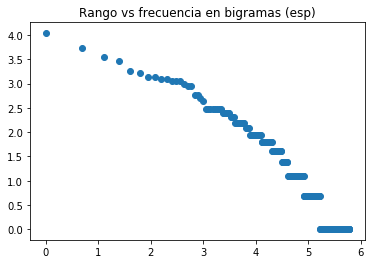

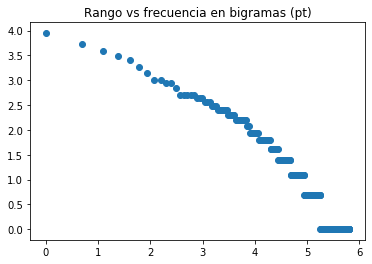

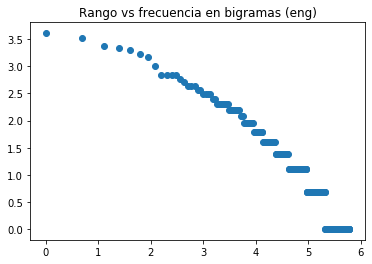

In [42]:
for index, counters in freq_bigamas.items():
    freq = [fr[1] for fr in counters.most_common()]
    ranks = range(1, len(freq)+1)
    plt.figure()
    plt.title(f'Rango vs frecuencia en bigramas ({clases[index]})')
    plt.scatter(np.log(ranks), np.log(freq))
    plt.show()